## Распознование чисел

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/home/user/Downloads/24/data/digit/train.csv')
test = pd.read_csv('/home/user/Downloads/24/data/digit/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train["label"].astype('float32')# сохраняем label в отдельную переменную
X_train = train.drop(["label"], axis=1).astype('int32')# удаляем label

In [6]:
X_train.shape, y_train.shape, test.shape

((42000, 784), (42000,), (28000, 784))

## Визуализируем исходные данные

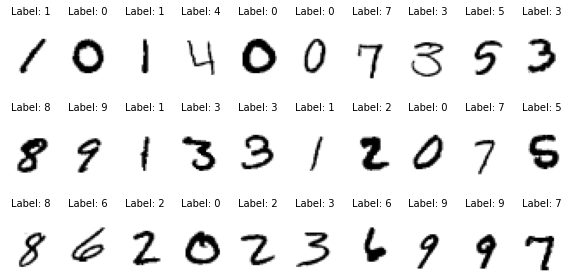

In [7]:
plt.figure(figsize=(10, 5))

for index, (image, label) in enumerate(zip(X_train[0:30], y_train[0:30])):
    ax = plt.subplot(3, 10, index + 1)
    ax.axis('off')
    plt.imshow(np.reshape(X_train.values[index], (28, 28)), cmap='binary')
    plt.title('Label: %i\n' % label, fontsize=10);

Text(0, 0.5, 'Count')

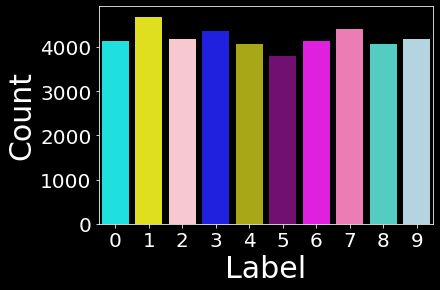

In [8]:
import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(6,4))
plt.xticks(size=20)
plt.yticks(size=20)

x = sns.countplot(x='label', data=train,palette=['cyan','yellow','pink','b','y','purple','magenta','hotpink','turquoise','lightblue']);
x.set_xlabel("Label",fontsize=30)
x.set_ylabel('Count',fontsize=30)

## Нормализация данных

In [9]:
#нормируем (от 0 до 1)
X_train = X_train/255
X_test = test/255

In [10]:
# приводим размерность к удобному для обаботки виду
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

## Нормируем label

In [11]:
#преобразуем числа в индекс (one hot encoding)
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

(42000, 10)

In [12]:
y_train[0:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Разделим данные

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

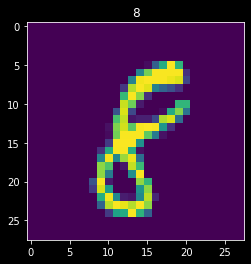

In [14]:
plt.imshow(X_train[0][:,:,0])
plt.title(y_train[0].argmax());

## Модель

In [15]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential, Model

input_shape = (28,28,1)
X_input = Input(input_shape)

# Слой 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)#двумерный сверточный слой
#(для повышения производительности и стабильности работы нейронной сети)
x = BatchNormalization()(x)#обрабатываем данные таким образом, чтобы они имели нулевое математическое ожидание и единичную дисперсию.
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)#понижаем размерность изображения (берем максимальные компаненты)
# Слой 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# Слой 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# вытягиваем в вектор и пропускаем через полносвязанные слои
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)#выключаем 25% нейроннов для борьбы с переобучением
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)#softmax - рапсределение версотяностей

model = Model(inputs=X_input, outputs=x, name='Predict')
model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128 

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val,y_val)).history

Epoch 1/15
296/296 [==============================] - 56s 186ms/step - loss: 1.1551 - accuracy: 0.6242 - val_loss: 3.6822 - val_accuracy: 0.1129
Epoch 2/15
296/296 [==============================] - 54s 183ms/step - loss: 0.1684 - accuracy: 0.9532 - val_loss: 0.3744 - val_accuracy: 0.8852
Epoch 3/15
296/296 [==============================] - 60s 202ms/step - loss: 0.1182 - accuracy: 0.9660 - val_loss: 0.0600 - val_accuracy: 0.9829
Epoch 4/15
296/296 [==============================] - 60s 204ms/step - loss: 0.0848 - accuracy: 0.9765 - val_loss: 0.1147 - val_accuracy: 0.9676
Epoch 5/15
296/296 [==============================] - 53s 179ms/step - loss: 0.0706 - accuracy: 0.9807 - val_loss: 0.0514 - val_accuracy: 0.9855
Epoch 6/15
296/296 [==============================] - 54s 181ms/step - loss: 0.0600 - accuracy: 0.9823 - val_loss: 0.0406 - val_accuracy: 0.9886
Epoch 7/15
296/296 [==============================] - 56s 190ms/step - loss: 0.0567 - accuracy: 0.9846 - val_loss: 0.0574 - val_ac

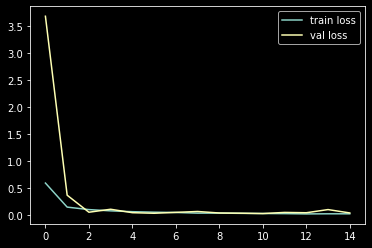

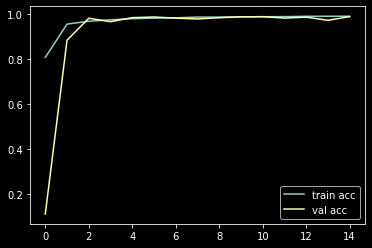

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(history['loss'], label='train loss')
plt.plot(history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history['accuracy'], label='train acc')
plt.plot(history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
y_pred = model.predict(X_test)
y_pred

array([[1.2434183e-09, 1.9506907e-09, 1.0000000e+00, ..., 1.1893743e-08,
        1.2257803e-10, 7.2375582e-12],
       [1.0000000e+00, 1.9182003e-09, 2.7915186e-09, ..., 8.0908608e-10,
        1.3725896e-09, 1.9866129e-09],
       [2.4803863e-09, 6.9778031e-11, 3.0853511e-11, ..., 2.1645108e-07,
        1.4390713e-07, 9.9999833e-01],
       ...,
       [1.5858980e-23, 2.5999744e-15, 3.0185422e-16, ..., 1.4068370e-13,
        3.6919693e-15, 1.5009087e-15],
       [1.0496868e-09, 2.0825175e-12, 3.2101897e-12, ..., 2.2930351e-07,
        1.2833463e-09, 9.9999630e-01],
       [3.3893942e-12, 3.6891310e-12, 1.0000000e+00, ..., 2.0281981e-11,
        7.8916447e-13, 5.6136257e-15]], dtype=float32)

In [22]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [23]:
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [24]:
my_submission.to_csv('submission.csv', index=False)